<a href="https://colab.research.google.com/github/michaelrwijaya/AirQualityIndexPrediction/blob/main/Proyek_Akhir_BCC_Kelompok_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Index Analysis & Prediction
### Kelompok 6
*   Michael Rahadiyan Wijaya
*   Nafakhatul Fadliyah





### Latar belakang

Analisis


*   Mencari tahu seberapa besar pengaruh polutan-polutan ke kualitas udara.
*   Menentukan kota mana yang memiliki kualitas udara paling burung menggunakan metode regression.


Prediksi


*   Memperkirakan apa yang harus parameter mana yang harus diperbaiki agar memperbaiki kualitas udara supaya Sustainable Development Goals nomor 15 (Lide on Land) dan nomor 13 (climate action) dapat tercapai.


### Dataset
> link : https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset


> source : kaggle

# Metadata



Country : Name of the country


City : Name of the city


AQI Value : Overall AQI value of the city


AQI Category : Overall AQI category of the city


CO AQI Value : AQI value of Carbon Monoxide of the city


CO AQI Category : AQI category of Carbon Monoxide of the city


Ozone AQI Value : AQI value of Ozone of the city


Ozone AQI Category : AQI category of Ozone of the city


NO2 AQI Value : AQI value of Nitrogen Dioxide of the city


NO2 AQI Category : AQI category of Nitrogen Dioxide of the city


PM2.5 AQI Value : AQI value of Particulate Matter with a diameter of 2.5 micrometers or less of the city


PM2.5 AQI Category : AQI category of Particulate Matter with a diameter of 2.5 micrometers or less of the city


# Data Loading And Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global air pollution dataset.csv to global air pollution dataset (1).csv


In [ ]:
df = pd.read_csv('global air pollution dataset.csv')

In [ ]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.tail()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate
23462,Malaysia,Marang,70,Moderate,1,Good,38,Good,0,Good,70,Moderate


In [ ]:
df.shape

(23463, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
df.nunique()

Country                 175
City                  23462
AQI Value               347
AQI Category              6
CO AQI Value             34
CO AQI Category           3
Ozone AQI Value         213
Ozone AQI Category        5
NO2 AQI Value            59
NO2 AQI Category          2
PM2.5 AQI Value         383
PM2.5 AQI Category        6
dtype: int64

In [ ]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [ ]:
df.describe(include = 'O').T

,count,unique,top,freq
Country,23036,175,United States of America,2872
City,23462,23462,Praskoveya,1
AQI Category,23463,6,Good,9936
CO AQI Category,23463,3,Good,23460
Ozone AQI Category,23463,5,Good,21069
NO2 AQI Category,23463,2,Good,23448
PM2.5 AQI Category,23463,6,Good,10208


# Data Cleaning

In [ ]:
df.duplicated().sum()

0

## Handling Missing Values

In [ ]:
df.isna().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)].head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
535,NaN,Granville,30,Good,1,Good,30,Good,3,Good,25,Good
654,NaN,Kingston Upon Hull,33,Good,1,Good,17,Good,8,Good,33,Good
787,NaN,New Waterford,20,Good,1,Good,18,Good,9,Good,20,Good
801,NaN,Kingstown,163,Unhealthy,0,Good,25,Good,0,Good,163,Unhealthy
906,NaN,Nanakuli,30,Good,0,Good,27,Good,0,Good,30,Good


In [ ]:
rasio = df.isna().sum() / df.count()
rasio

Country               0.018536
City                  0.000043
AQI Value             0.000000
AQI Category          0.000000
CO AQI Value          0.000000
CO AQI Category       0.000000
Ozone AQI Value       0.000000
Ozone AQI Category    0.000000
NO2 AQI Value         0.000000
NO2 AQI Category      0.000000
PM2.5 AQI Value       0.000000
PM2.5 AQI Category    0.000000
dtype: float64

In [ ]:
df['Country'] = df['Country'].fillna('Unknown')
#Mengganti Nilai Null Pada Column Country Dengan Unknown Menggunakan Imputation

In [ ]:
df['City'] = df['City'].fillna('Unknown')
#Mengganti Nilai Null Pada Column City Dengan Unknown Menggunakan Imputation

In [ ]:
df.isna().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

## Dealing With Outlier

Text(0.5, 1.0, 'PM2.5 AQI Value')

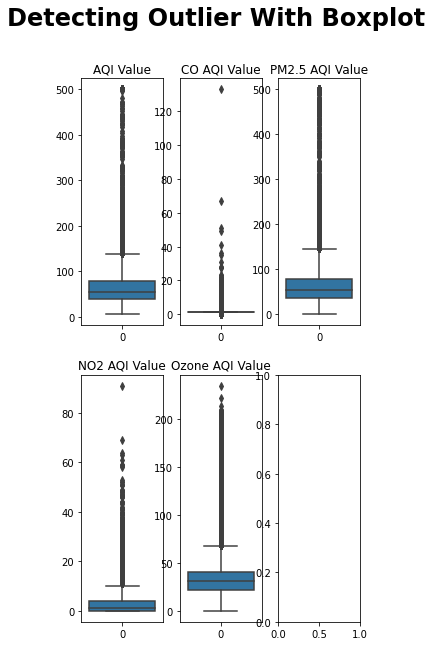

In [ ]:
fig,ax = plt.subplots(2,3,figsize=(5,10))
fig.suptitle('Detecting Outlier With Boxplot',fontsize=24,weight='bold')

ax1 = sns.boxplot(data = df['AQI Value'], ax=ax[0,0])
ax1.set_title('AQI Value')

ax2 = sns.boxplot(data = df['CO AQI Value'], ax=ax[0,1])
ax2.set_title('CO AQI Value')

ax3 = sns.boxplot(data = df['NO2 AQI Value'], ax=ax[1,0])
ax3.set_title('NO2 AQI Value')

ax4 = sns.boxplot(data = df['Ozone AQI Value'], ax=ax[1,1])
ax4.set_title('Ozone AQI Value')

ax5 = sns.boxplot(data = df['PM2.5 AQI Value'], ax=ax[0,2])
ax5.set_title('PM2.5 AQI Value')

Dapat Dilihat Dari Deteksi Outlier Bahwa Seluruh Column Numerik Memiliki Nilai Outlier. Namun Berdasarkan Hasil Literasi Kami yaitu Dokumen Berjudul "Technical Assistance Document for the Reporting of Daily Air Quality – the Air Quality Index (AQI)" dari U.S. Environmental Protection Agency Office of Air Quality Planning and Standards Air Quality Assessment Division, Sebuah AQI Value Memiliki Nilai Maksimal Sebesar 500 Unit, dan Dapat Dilihat Bahwa Tidak Ada Nilai yang Melebihi 500 Unit.

Nilai Yang Tidak Melebehi 500 unit tetapi dianggap sebagai outlier adalah True Outlier, dimana outlier ini merupakan variasi natural dari populasi dataset. Outlier ini tidak dihapus atau dihilangkan karena akan berakibat pada hasil processing, modelling dan evaluasi kedepannya.

# Exploratory Data Analysis

## Numerical Data Analysis

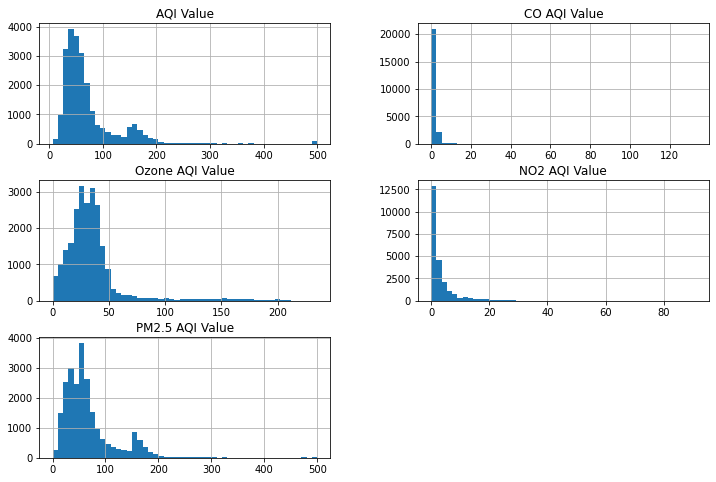

In [ ]:
df.hist(bins = 50, figsize=(12,8))
plt.title('Distribusi Pada Label Dan Numerical Feature')
plt.show()

Semua Distribusi Nilai Column Numerik Memiliki Distribusi Miring Positif

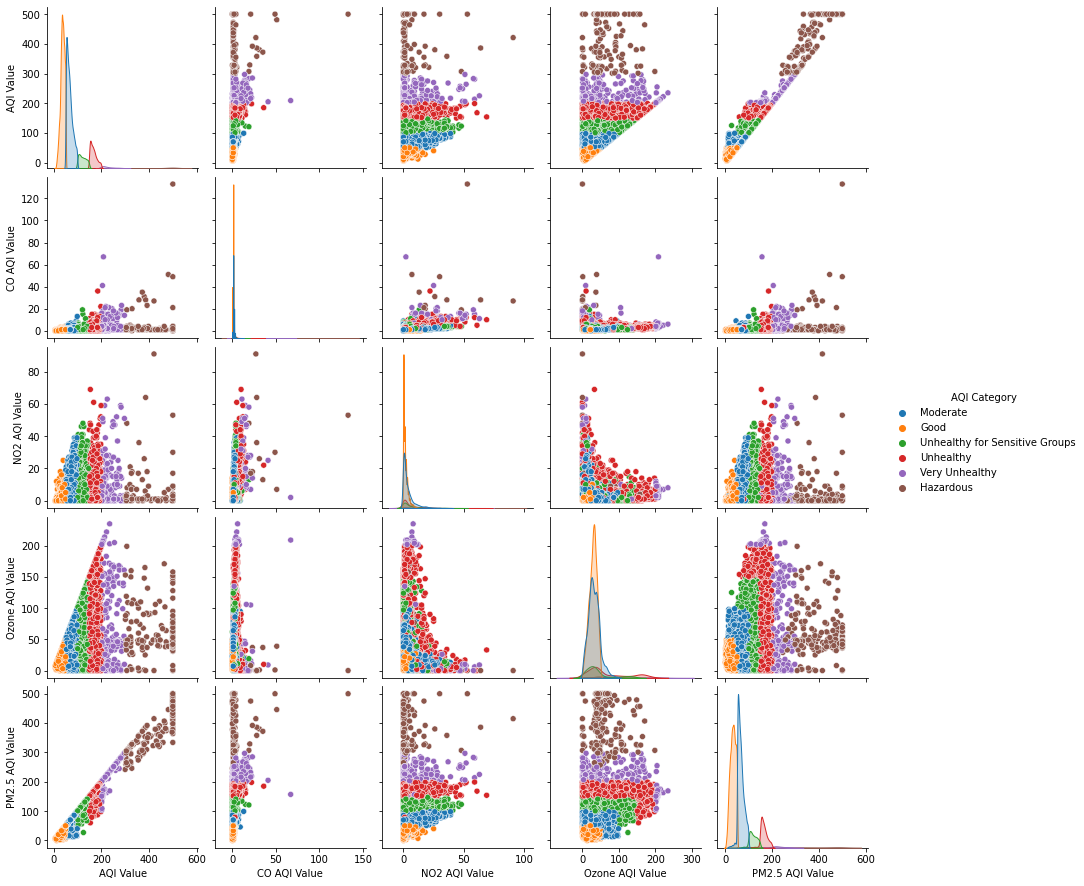

In [ ]:
sns.pairplot(df, vars=['AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value'], hue = 'AQI Category')
plt.show()



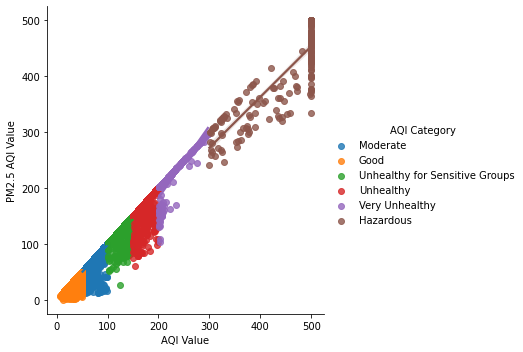

In [ ]:
sns.lmplot(data = df, x = 'AQI Value',y = 'PM2.5 AQI Value', hue = 'AQI Category')

Menggunakan Pairplot Bertipe Scatter Plot Untuk Melihat Hubungan Antara Masing Masing Column Numerik.Pada Hubungan AQI Value dan PM2.5 AQI Value Dapat Memiliki Hubungan Yang Paling  Kuat Karena Linear dan Ke Arah Positif

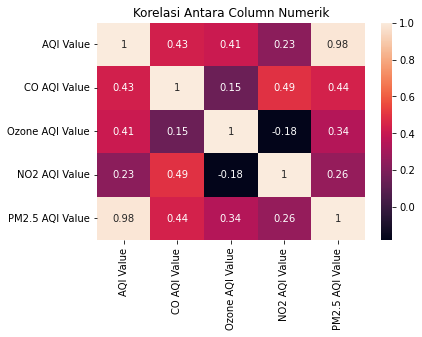

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.title('Korelasi Antara Column Numerik')
plt.show()

Menggunakan Heatmap Untuk Melihat Korelasi Antara Column Numerik.Hubungan PM2.5 AQI Value dan AQI Value Paling Kuat Dengan Korelasi Hampir Sempurna Yaitu 0.98

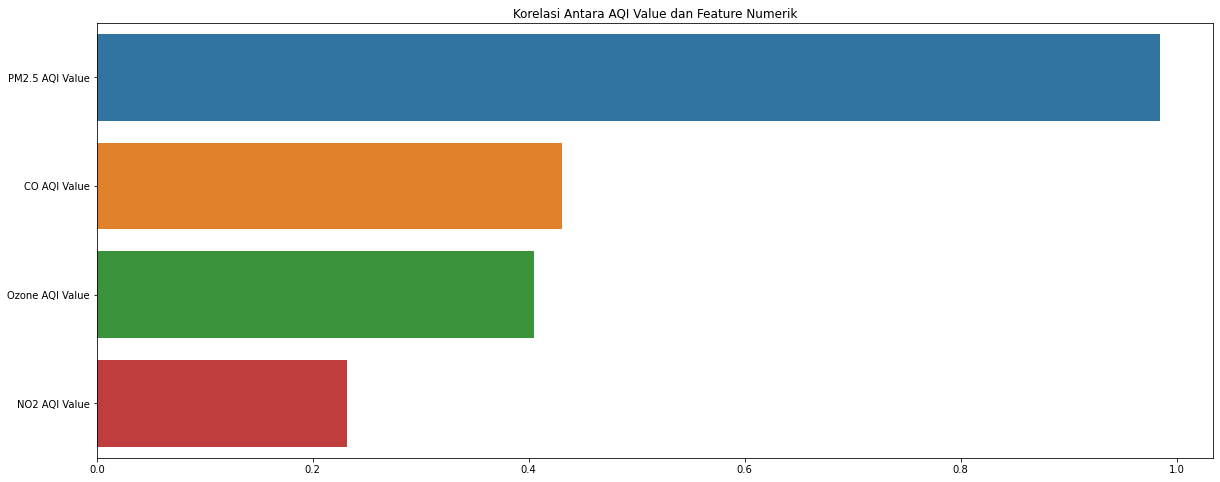

In [ ]:
df_corr = df.corr()['AQI Value'].sort_values(ascending=False)[1:]
fig,ax = plt.subplots(1,figsize=(20,8))
sns.barplot(y=df_corr.index,x=df_corr.values,ax=ax)
plt.title('Korelasi Antara AQI Value dan Feature Numerik')
plt.show()

## Categorical Analysis

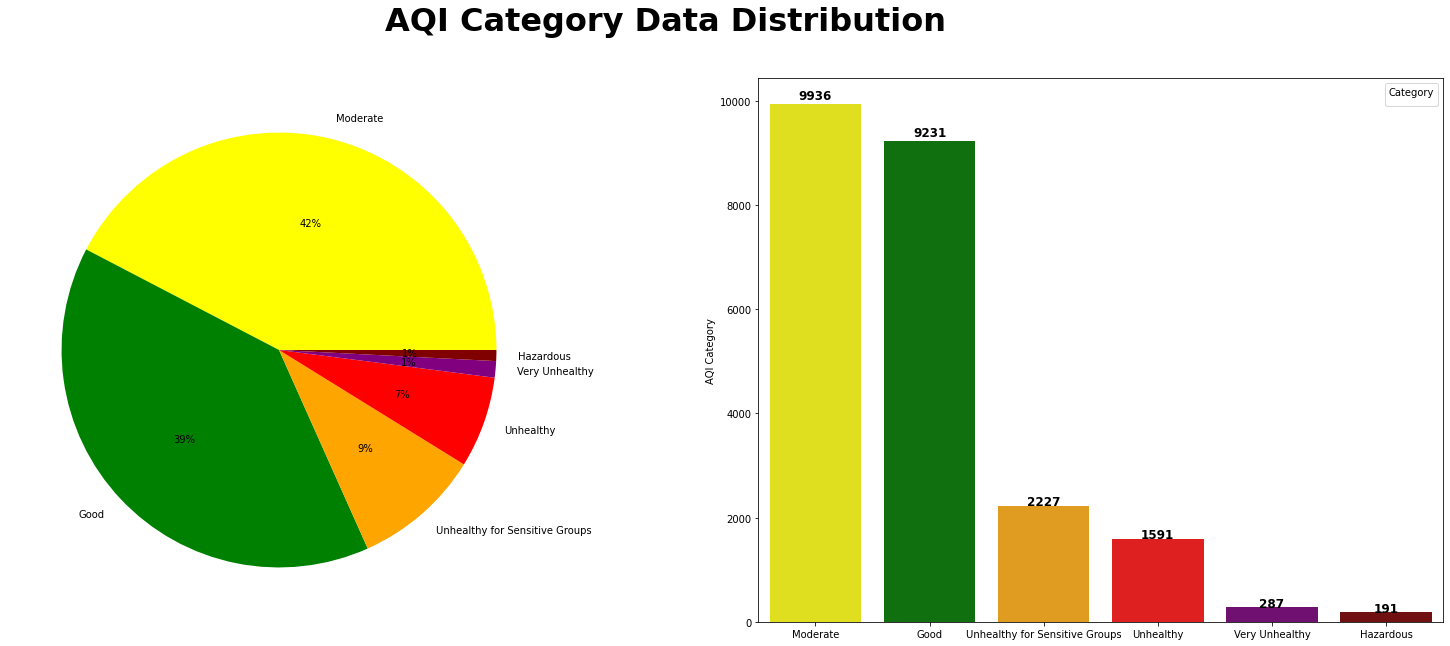

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(27,10))
fig.suptitle('AQI Category Data Distribution',fontsize=32,weight='bold')

sns.barplot(x=df['AQI Category'].unique(),y=df['AQI Category'].value_counts(),ax=ax[1],  palette = {'Good' : 'green', 'Moderate' : 'yellow', 'Unhealthy for Sensitive Groups' : 'orange', 'Unhealthy' : 'red', 'Very Unhealthy' : 'purple', 'Hazardous' : 'maroon' })
for i, value in enumerate(df['AQI Category'].value_counts()):  ax[1].text(i,value*1.01,value,fontsize=12,weight='semibold',ha='center')

ax[0].pie(data  = df['AQI Category'].value_counts(),x= df['AQI Category'].value_counts(), labels = df['AQI Category'].unique(),autopct='%.0f%%', colors = ['yellow','green',  'orange', 'red', 'purple','maroon'], labeldistance=1.1)
plt.legend(title = "Category")
plt.show()

Menggunakan barplot dan pie chart untuk menampilkan distribusi data pada AQI Category dengan distribusi yang cukup merata dan dengan kategori yang memiliki nilai paling banyak adalah "Moderate".

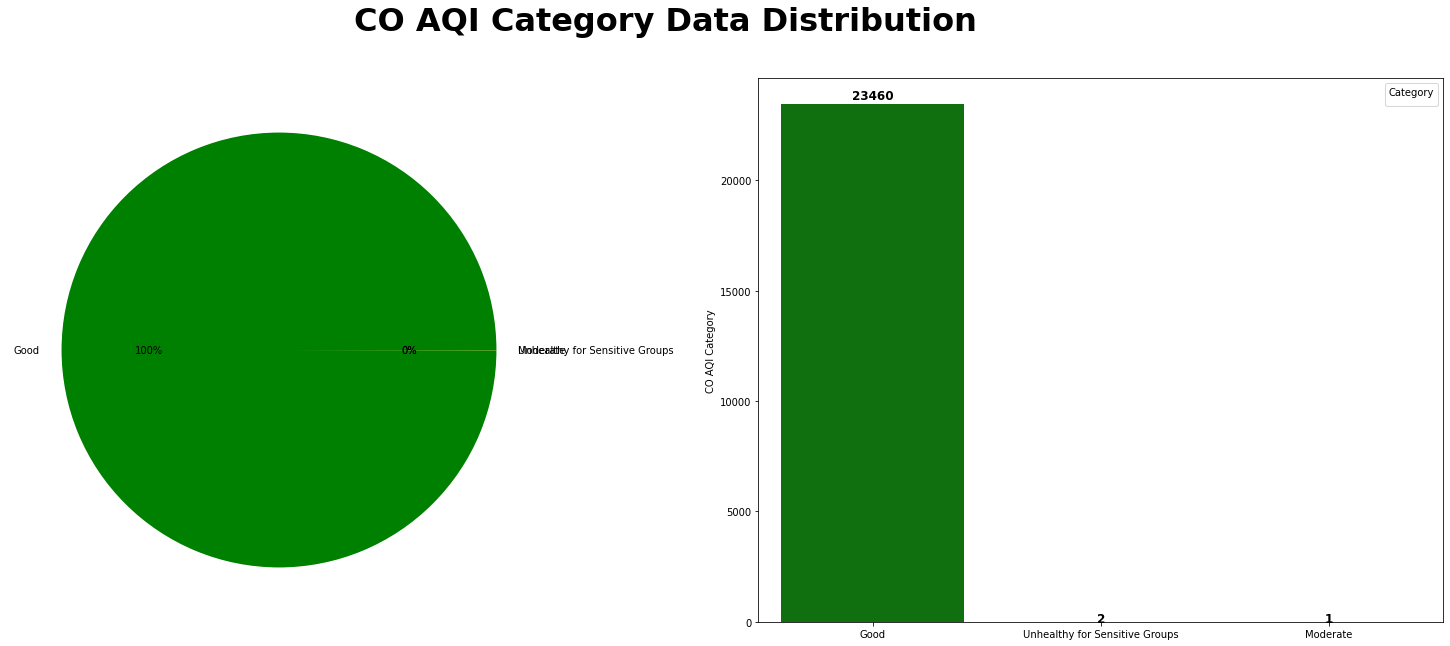

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(27,10))
fig.suptitle('CO AQI Category Data Distribution',fontsize=32,weight='bold')

sns.barplot(x=df['CO AQI Category'].unique(),y=df['CO AQI Category'].value_counts(),ax=ax[1],  palette = {'Good' : 'green', 'Moderate' : 'yellow', 'Unhealthy for Sensitive Groups' : 'orange', 'Unhealthy' : 'red', 'Very Unhealthy' : 'purple', 'Hazardous' : 'maroon' })
for i, value in enumerate(df['CO AQI Category'].value_counts()):  ax[1].text(i,value*1.01,value,fontsize=12,weight='semibold',ha='center')

ax[0].pie(data  = df['CO AQI Category'].value_counts(),x= df['CO AQI Category'].value_counts(), labels = df['CO AQI Category'].unique(),autopct='%.0f%%', colors = ['green', 'yellow', 'orange', 'red', 'purple','maroon'], labeldistance=1.1)
plt.legend(title = "Category")
plt.show()

Menggunakan barplot dan pie chart untuk menampilkan distribusi data pada CO AQI Category. Hampir 100% dari data memiliki kategori "Good". Kategori lainnya yang muncul adalah "Unhealthy for Sensitive Groups" dan "Moderate"

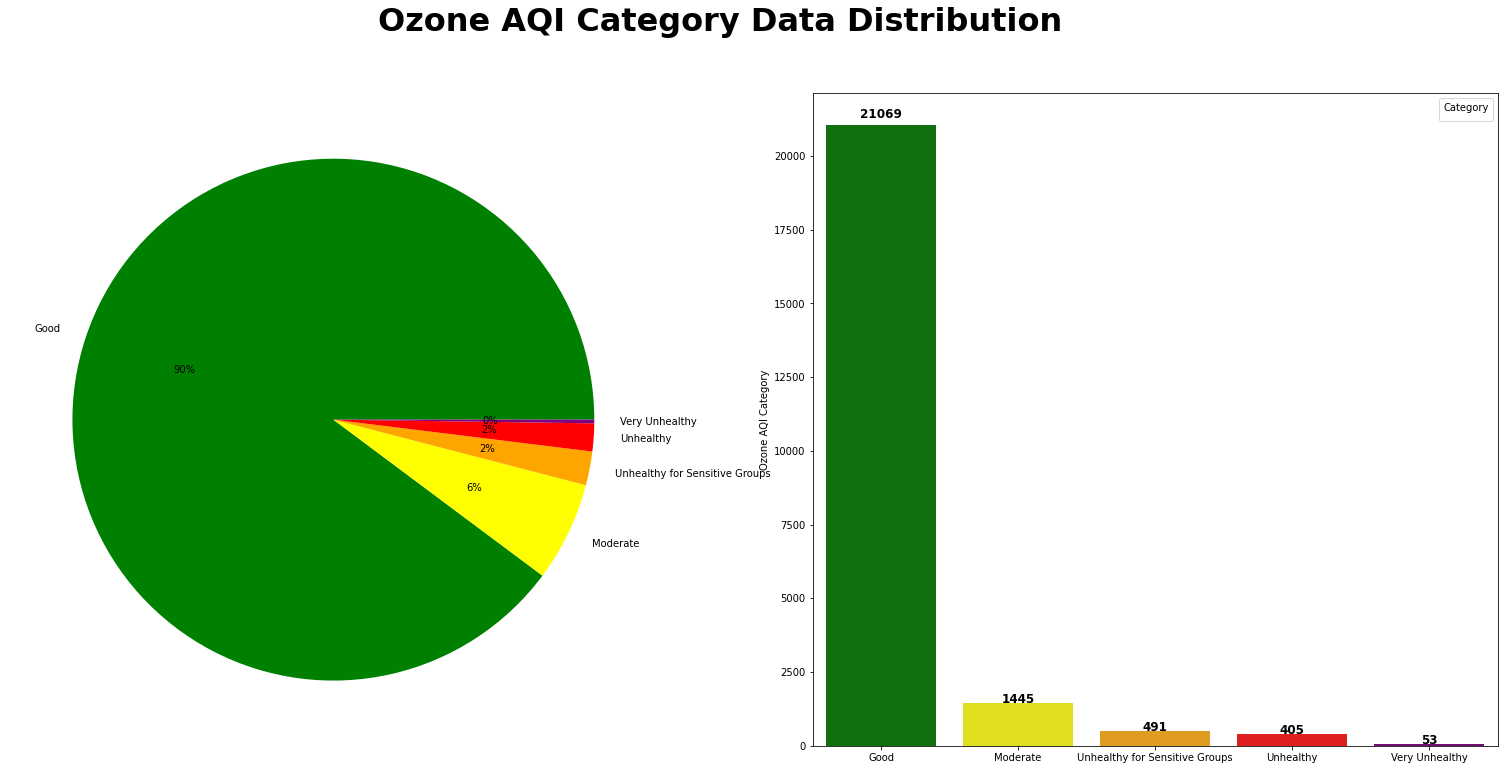

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(27,12))
fig.suptitle('Ozone AQI Category Data Distribution',fontsize=32,weight='bold')

sns.barplot(x=df['Ozone AQI Category'].unique(),y=df['Ozone AQI Category'].value_counts(),ax=ax[1],  palette = {'Good' : 'green', 'Moderate' : 'yellow', 'Unhealthy for Sensitive Groups' : 'orange', 'Unhealthy' : 'red', 'Very Unhealthy' : 'purple', 'Hazardous' : 'maroon' })
for i, value in enumerate(df['Ozone AQI Category'].value_counts()):  ax[1].text(i,value*1.01,value,fontsize=12,weight='semibold',ha='center')

ax[0].pie(data  = df['Ozone AQI Category'].value_counts(),x= df['Ozone AQI Category'].value_counts(), labels = df['Ozone AQI Category'].unique(),autopct='%.0f%%', colors = ['green','yellow',  'orange', 'red', 'purple','maroon'], labeldistance=1.1)
plt.legend(title = "Category")
plt.show()

Menggunakan barplot dan pie chart untuk menampilkan distribusi data pada Ozone AQI Category. Sekitar 90% data berkategori "Good"

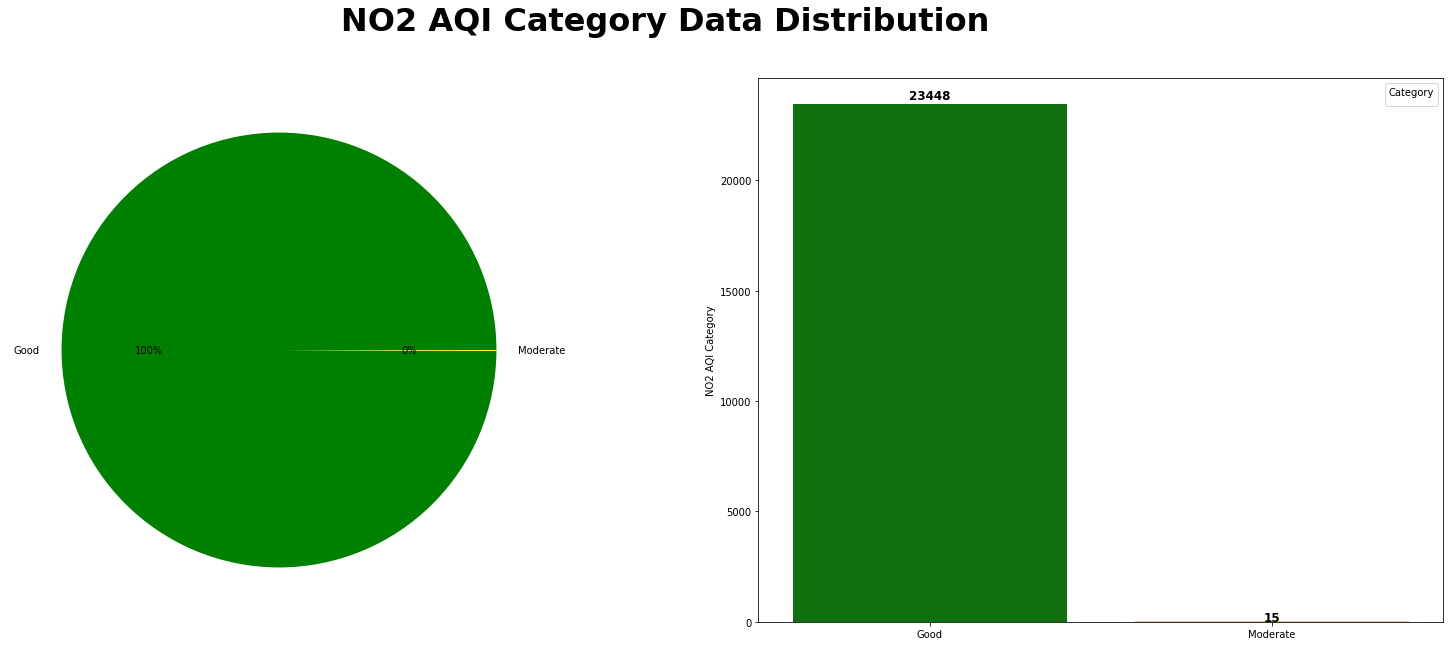

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(27,10))
fig.suptitle('NO2 AQI Category Data Distribution',fontsize=32,weight='bold')

sns.barplot(x=df['NO2 AQI Category'].unique(),y=df['NO2 AQI Category'].value_counts(),ax=ax[1],  palette = {'Good' : 'green', 'Moderate' : 'yellow', 'Unhealthy for Sensitive Groups' : 'orange', 'Unhealthy' : 'red', 'Very Unhealthy' : 'purple', 'Hazardous' : 'maroon' })
for i, value in enumerate(df['NO2 AQI Category'].value_counts()):  ax[1].text(i,value*1.01,value,fontsize=12,weight='semibold',ha='center')

ax[0].pie(data  = df['NO2 AQI Category'].value_counts(),x= df['NO2 AQI Category'].value_counts(), labels = df['NO2 AQI Category'].unique(),autopct='%.0f%%', colors = ['green', 'yellow', 'orange', 'red', 'purple','maroon'], labeldistance=1.1)
plt.legend(title = "Category")
plt.show()

Menggunakan barplot dan pie chart untuk menampilkan distribusi data pada NO2 AQI Category. Hampir 100% dari data memiliki kategori "Good". Kategori lainnya yang muncul adalah "Moderate"

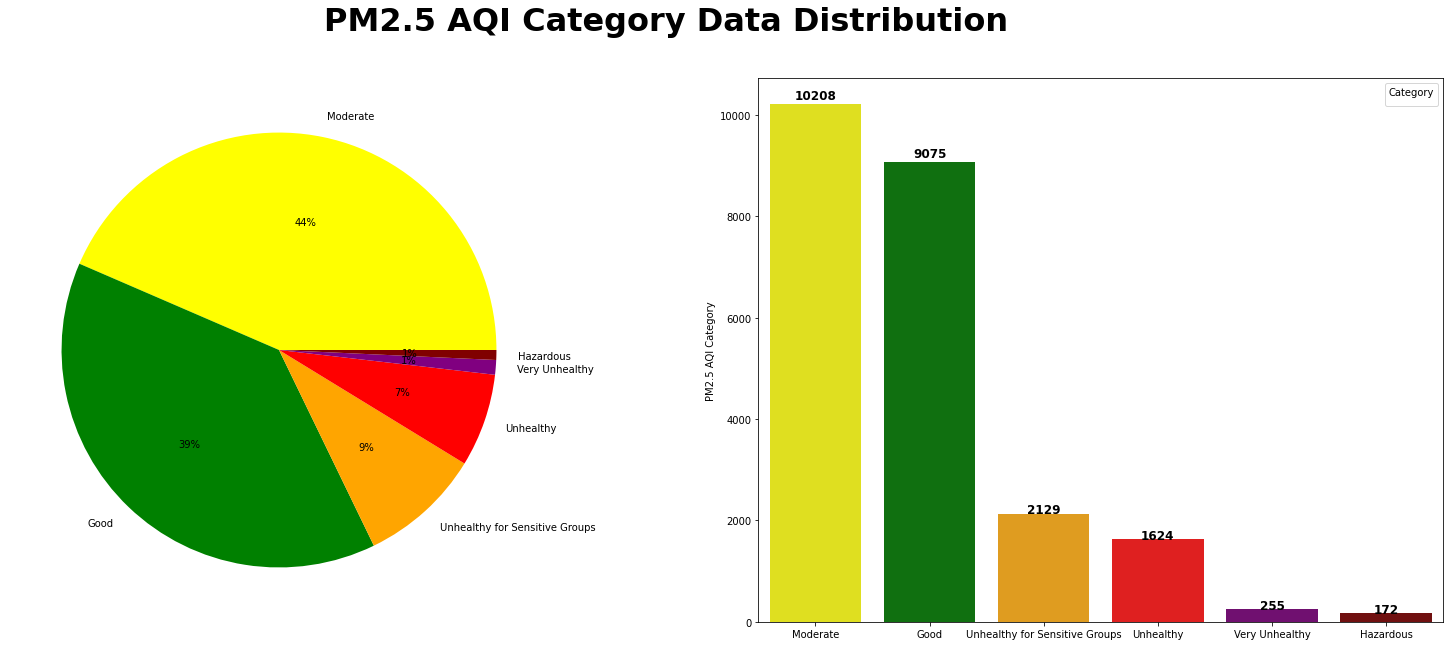

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(27,10))
fig.suptitle('PM2.5 AQI Category Data Distribution',fontsize=32,weight='bold')

sns.barplot(x=df['PM2.5 AQI Category'].unique(),y=df['PM2.5 AQI Category'].value_counts(),ax=ax[1],  palette = {'Good' : 'green', 'Moderate' : 'yellow', 'Unhealthy for Sensitive Groups' : 'orange', 'Unhealthy' : 'red', 'Very Unhealthy' : 'purple', 'Hazardous' : 'maroon' })
for i, value in enumerate(df['PM2.5 AQI Category'].value_counts()):  ax[1].text(i,value*1.01,value,fontsize=12,weight='semibold',ha='center')

ax[0].pie(data  = df['PM2.5 AQI Category'].value_counts(),x= df['PM2.5 AQI Category'].value_counts(), labels = df['PM2.5 AQI Category'].unique(),autopct='%.0f%%', colors = ['yellow','green',  'orange', 'red', 'purple','maroon'], labeldistance=1.1)
plt.legend(title = "Category")
plt.show()

Menggunakan barplot dan pie chart untuk menampilkan distribusi data pada PM2.5 AQI Category dengan distribusi yang cukup merata dan kategori yang memiliki nilai paling banyak adalah "Moderate".

## Siapakah Negara Yang Memiliki Kualitas Udara Terburuk

In [ ]:
df_worst = df.groupby('Country', as_index=False).agg('mean').sort_values(by='AQI Value').tail(10)

df_worst2 = df.groupby('Country', as_index=False).agg('mean').sort_values(by='AQI Value',ascending=False).head(5)

fig = px.bar(df_worst,x='AQI Value', y='Country',title="Negara Yang Memiliki Kualitas Udara Terburuk ", barmode='group', text_auto='.0f',  color='AQI Value')
fig.show()

Republic Of Korea atau Korea Selatan Memiliki Rata Rata AQI Value Terburuk Dari Seluruh Negara, Menurut  National Institute of Environmental Research Pada Laporan 2016 Mengatakan Bahwa, Polusi Yang Terjadi di Korea Selatan Diakibatkan Oleh Polusi Udara Dari Tetangganya yaitu China, Akibat Penyebaran Debu Kuning Yang Diproduksi Oleh Pabrik dan Pembakaran Bahan Bakar Fosil Untuk Energi di China. Selain Itu Dari Korea Selatan Juga Menghasilkan Polusi Udara Yang Cukup Buruk Akibat Industrilisasi dan Penggunaan Kenderaan Yang Berlebih Karena Depedensi Korea Selatan Pada Bahan Bakar Fosil Seperti Minyak Bumi, Batubara, dll.

Namun Akhir Akhir Ini, Pada Tahun 2019  The Korean Ministry of Environment melakukan monitoring dan regulasi untuk pengontrolan kualitas udara di Korea, dimana mereka mengeluarkan regulasi seputar standar emisi yang lebih ketat dan regulasi subtansi baru sebagai standar emisi polusi. Diharapkan bahwa regulasi ini dapat memperbaiki kualitas udara yang ada di Korea.

## Siapakah Negara Yang Memiliki Kualitas Udara Terbaik

In [ ]:
df_best = df.groupby('Country', as_index=False).agg('mean').sort_values(by='AQI Value',ascending = False).tail(10)
df_best2 = df.groupby('Country', as_index=False).agg('mean').sort_values(by='AQI Value').head(5)

fig = px.bar(df_best,x='AQI Value', y='Country',title="Negara Yang Memiliki Kualitas Udara Terbaik ", barmode='group', text_auto='.0f',  color='AQI Value')
fig.show()

Negara yang memiliki kualitas Udara Terbaik adalah Palau. Faktor yang membuat Palau memiliki kualitas udara yang baik adalah dibentuknya badan bernama Palau Environmental Quality Protection Board sejak tahun 1981, sekaligus mengeluarkan peraturan  “Environmental Quality Protection Act,” Title 24 of the Palau National Code Annotated dimana terdapat regulasi dan peraturan tentang sustainable environment, economic dan social development dari Palau. Dalam peraturan ini mencakup seluruh regulasi lingkungan di Palau, khususnya Kualitas Udara disana, dimana standar tersebut sangatlah ketat dan jauh berbeda dari kebanyakan negara.

## Siapakah Kota Yang Memiliki Kualitas Udara Terburuk

In [ ]:
aql_overall = df[['Country','City','AQI Value','AQI Category']]
hazardous = aql_overall.groupby('City', as_index=False).agg('sum').sort_values(by='AQI Value',ascending = False).head(10)

fig = px.bar(hazardous,x='AQI Value', y='City',title="Siapakah Kota Yang Memiliki Kualitas Udara Terburuk ", barmode='group', text_auto='.0f',  color='AQI Value')
fig.show()

## Siapakah Kota Yang Memiliki Kualitas Udara Terbaik

In [ ]:
aql_overall_good = aql_overall[aql_overall['AQI Category'] == 'Good']
good = aql_overall_good.groupby('City',as_index=False)['AQI Value'].sum().sort_values(by='AQI Value', ascending = False).tail(10)

fig = px.bar(good,x='AQI Value', y='City',title="Siapakah Kota Yang Memiliki Kualitas Udara Terbaik ", barmode='group', text_auto='.0f', color='AQI Value')
fig.show()

## Bagaimana Ciri Ciri Polutan Di Negara Yang Memiliki Kualitas Udara Terbaik?

In [ ]:
fig = px.bar(pd.DataFrame(df_best2.reset_index()), x="Country", y=["PM2.5 AQI Value", "CO AQI Value", "Ozone AQI Value", 'NO2 AQI Value'], title="Ciri Ciri Polutan Negara Dengan Kualitas Udara Terbaik ", barmode='group', text_auto='.0f')
fig.show()

## Bagaimana Ciri Ciri Polutan Di Negara Yang Memiliki Kualitas Udara Terburuk?

In [ ]:
fig = px.bar(pd.DataFrame(df_worst2.reset_index()), x="Country", y=["PM2.5 AQI Value", "CO AQI Value", "Ozone AQI Value", 'NO2 AQI Value'], title="Ciri Ciri Polutan Negara Dengan Kualitas Udara Terburuk ", barmode='group', text_auto='.0f')
fig.show()

## Bagaimana Ciri Ciri Polutan Di Kota Yang Memiliki Kualitas Udara Terbaik?

In [ ]:
df_best_city = df.groupby('City', as_index=False).agg('sum').sort_values(by='AQI Value').head(5)
fig = px.bar(pd.DataFrame(df_best_city.reset_index()), x="City", y=["PM2.5 AQI Value", "CO AQI Value", "Ozone AQI Value", 'NO2 AQI Value'], title="Ciri Ciri Polutan Kota Dengan Kualitas Udara Terbaik ", barmode='group', text_auto='.0f')
fig.show()

##Bagaimana Ciri Ciri Polutan Di Kota Yang Memiliki Kualitas Udara Terburuk?

In [ ]:
df_worst_city = df.groupby('City', as_index=False).agg('sum').sort_values(by='AQI Value',ascending = False).head(5)
fig = px.bar(pd.DataFrame(df_worst_city.reset_index()), x="City", y=["PM2.5 AQI Value", "CO AQI Value", "Ozone AQI Value", 'NO2 AQI Value'], title="Ciri Ciri Polutan Kota Dengan Kualitas Udara Terburuk ", barmode='group', text_auto='.0f')
fig.show()

## Bagaimanakah Kualitas Udara Di Indonesia?

In [ ]:
df_best = df.groupby('Country', as_index=False).agg('mean').sort_values(by='AQI Value',ascending = False)
df_best_indo = df_best[df_best['Country'] == 'Indonesia']

fig = px.bar(df_best_indo,y='AQI Value', x='Country',title="Kualitas Udara Di Indonesia", barmode='group', text_auto='.0f',  color='AQI Value')
fig.show()

## Bagaimana Ciri Ciri Polutan Di Negara Indonesia

In [ ]:
fig = px.bar(pd.DataFrame(df_best_indo.reset_index()), x="Country", y=["PM2.5 AQI Value", "CO AQI Value", "Ozone AQI Value", 'NO2 AQI Value'], title="Ciri Ciri Polutan Negara Indonesia ", barmode='group', text_auto='.0f')
fig.show()

# Modelling

In [ ]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [ ]:
y = df['AQI Value']
feature = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
x = df[feature]

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import xgboost as xg
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from math import sqrt

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

##Pipeline

In [ ]:
#XGBoost
xg_pipe = Pipeline([("transformer1",MinMaxScaler()),("xgb_reg", xg.XGBRegressor())])
#Random Forest
rf_pipe = Pipeline([("transformer2",MinMaxScaler()),("rf_reg", RandomForestRegressor())])
#LinearSVR
svr_pipe = Pipeline([("transformer3",MinMaxScaler()),("svr_reg", LinearSVR())])

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xg_pipe, x, y, cv=10))
print(cross_val_score(rf_pipe, x, y, cv=10))
print(cross_val_score(svr_pipe, x, y, cv=10))

[0.99737433 0.99800184 0.99893596 0.99740211 0.99889322 0.99591175
 0.99716159 0.99930116 0.9991882  0.9995081 ]
[0.99776275 0.99794155 0.9993403  0.99698972 0.99864895 0.99691318
 0.99740737 0.99918161 0.99892109 0.99966243]
[0.96772272 0.95853303 0.97059342 0.96448879 0.96333712 0.97165234
 0.97072012 0.96321929 0.96828569 0.96349359]


## XGBOOST

In [ ]:
xg_pipe.fit(train_x, train_y)

Pipeline(steps=[('transformer1', MinMaxScaler()),
                ('xgb_reg',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
xg_predictions = xg_pipe.predict(test_x)
xg_predictions

array([160.25848 ,  31.98059 ,  60.951942, ...,  56.897156,  54.25401 ,
        38.851574], dtype=float32)

In [ ]:
print('RMSE : ',sqrt(mean_squared_error(test_y, xg_predictions)))

RMSE :  2.7082922733791635


In [ ]:
print('MAPE : {0:.3f}%'.format(mape(test_y, xg_predictions)))

MAPE : 0.389%


###Hyperparameter Tuning

In [ ]:
 xg_param = {'xgb_reg__max_depth': [10, 25, 50, 75, 100, None],
              'xgb_reg__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, None],
              'xgb_reg__n_estimators': [100, 250, 500, 750]
              }

In [ ]:
gs_xg = RandomizedSearchCV(xg_pipe, param_distributions = xg_param)

In [ ]:
gs_xg.fit(train_x, train_y)

RandomizedSearchCV(estimator=Pipeline(steps=[('transformer1', MinMaxScaler()),
                                             ('xgb_reg',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           grow_policy=None,
                                                           importance...
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]),
                   param_distributions={'xgb_reg__learning_rate': [0.01, 0.1,
                                                                   0.2, 0.3,
                                                                   0.4, None],
                                        'xgb_reg__max_depth': [10, 25, 50, 75,
                                                               100, None],
                                        'xgb_reg__n_estimators': [100, 250, 500,
                                                                  750]})

In [ ]:
gs_xg.best_params_

{'xgb_reg__n_estimators': 750,
 'xgb_reg__max_depth': 50,
 'xgb_reg__learning_rate': 0.01}

In [ ]:
xg_ht = xg.XGBRegressor(n_estimators = 750, max_depth = 50, learning_rate = 0.01)
xg_ht.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=50, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=750, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xg_ht_pred = xg_ht.predict(test_x)

In [ ]:
print('RMSE : ', sqrt(mean_squared_error(test_y,xg_ht_pred)))

RMSE :  2.7363073784715937


In [ ]:
print('MAPE : {0:.3f}%'.format(mape(test_y, xg_ht_pred)))

MAPE : 0.160%


In [ ]:
xg_feature_importance = pd.DataFrame(xg_ht.feature_importances_, index = feature).sort_values(by=0,ascending=False)
xg_feature_importance

,0
PM2.5 AQI Value,0.980390
Ozone AQI Value,0.017613
CO AQI Value,0.001018
NO2 AQI Value,0.000978


In [ ]:
fig = px.bar(xg_feature_importance, title="Feature Importance Random Forest", barmode='group', text_auto = '.4f')
fig.show()

## Random Forest Regression

In [ ]:
rf_pipe.fit(train_x, train_y)

Pipeline(steps=[('transformer2', MinMaxScaler()),
                ('rf_reg', RandomForestRegressor())])

In [ ]:
rfr_predictions = rf_pipe.predict(test_x)
rfr_predictions

array([160.,  32.,  61., ...,  57.,  54.,  39.])

In [ ]:
print('RMSE : ', sqrt(mean_squared_error(test_y,rfr_predictions)))

RMSE :  3.0914693454641866


In [ ]:
print('MAPE : {0:.3f}%'.format(mape(test_y, rfr_predictions)))

MAPE : 0.119%


### Hyperparameter Tunning

In [ ]:
param_rfr = {
    'rf_reg__max_depth' : [10,20,40,60,80,100, None],
    'rf_reg__max_features' : [2,4,8,10, None],
    'rf_reg__n_estimators' : [100,200,300,400,500]
}

In [ ]:
rs_rfr = RandomizedSearchCV(rf_pipe, param_distributions = param_rfr, scoring = 'neg_root_mean_squared_error')

In [ ]:
rs_rfr.fit(train_x, train_y)

RandomizedSearchCV(estimator=Pipeline(steps=[('transformer2', MinMaxScaler()),
                                             ('rf_reg',
                                              RandomForestRegressor())]),
                   param_distributions={'rf_reg__max_depth': [10, 20, 40, 60,
                                                              80, 100, None],
                                        'rf_reg__max_features': [2, 4, 8, 10,
                                                                 None],
                                        'rf_reg__n_estimators': [100, 200, 300,
                                                                 400, 500]},
                   scoring='neg_root_mean_squared_error')

In [ ]:
rs_rfr.best_params_

{'rf_reg__n_estimators': 500,
 'rf_reg__max_features': 8,
 'rf_reg__max_depth': 100}

In [ ]:
rfr_ht = RandomForestRegressor(n_estimators = 500, max_features = 8, max_depth= 100)
rfr_ht.fit(train_x, train_y)

RandomForestRegressor(max_depth=100, max_features=8, n_estimators=500)

In [ ]:
rfr_ht_pred = rfr_ht.predict(test_x)

In [ ]:
print('RMSE : ', sqrt(mean_squared_error(test_y,rfr_ht_pred)))

RMSE :  3.064271698452437


In [ ]:
print('MAPE : {0:.3f}%'.format(mape(test_y, rfr_ht_pred)))

MAPE : 0.122%


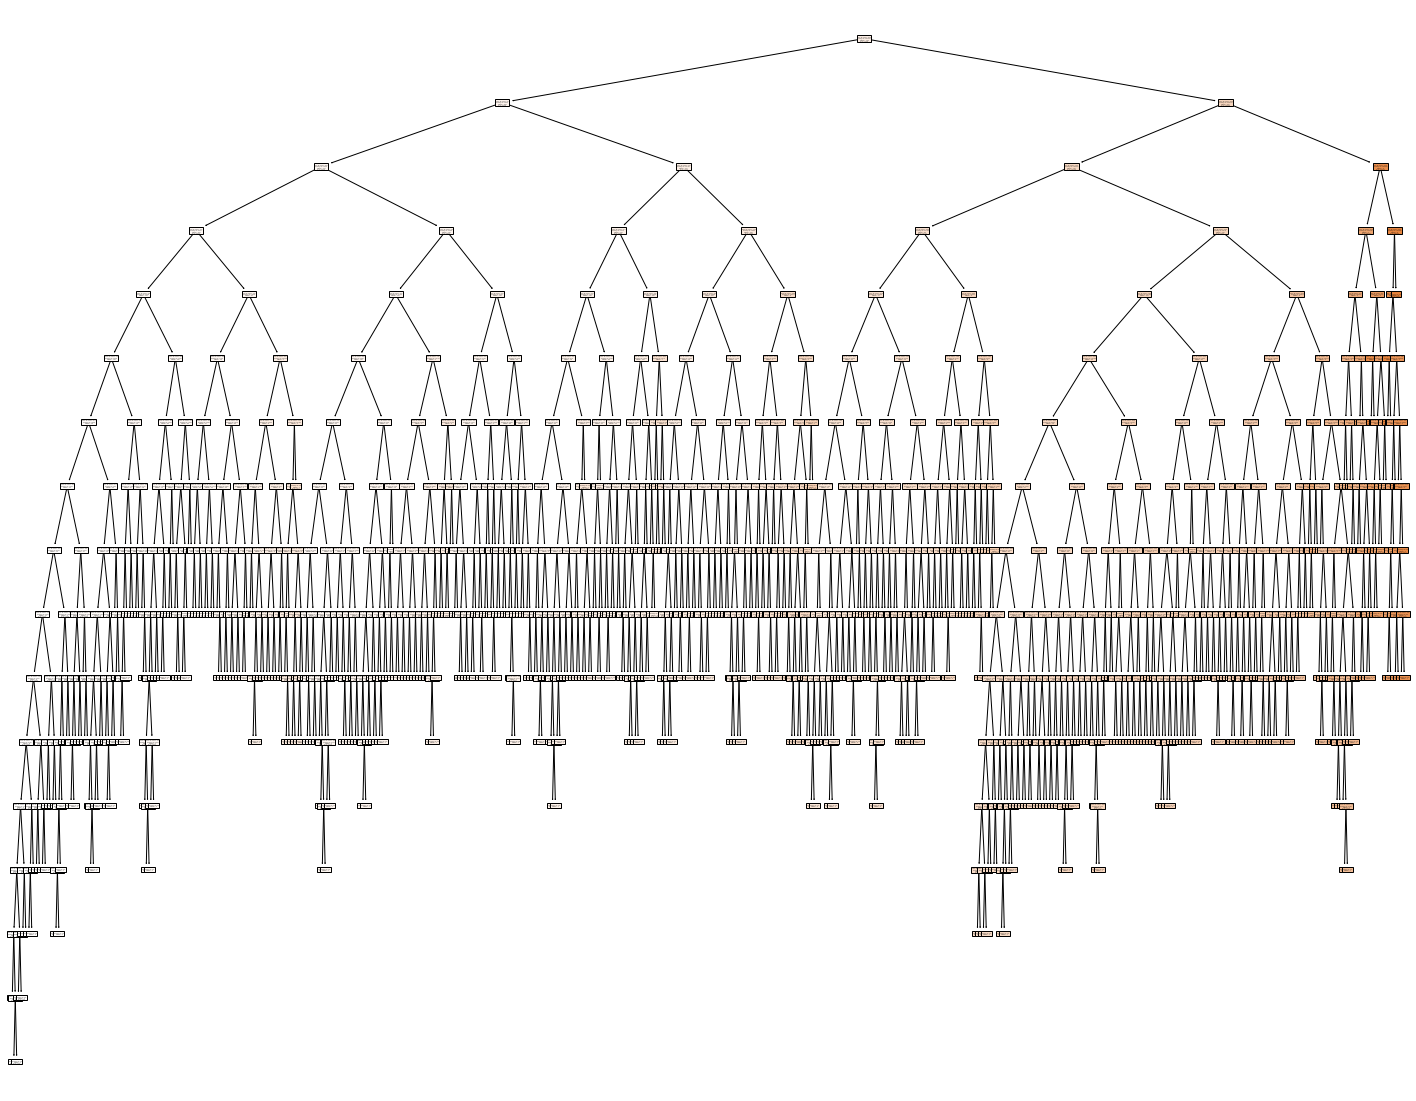

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
rfr = tree.plot_tree(rfr_ht.estimators_[0], feature_names = feature, class_names = df['AQI Value'],filled=True)
plt.show()

In [ ]:
rfr_feature_importance = pd.DataFrame(rfr_ht.feature_importances_, index = feature).sort_values(by=0,ascending=False)
rfr_feature_importance

,0
PM2.5 AQI Value,0.979577
Ozone AQI Value,0.019263
CO AQI Value,0.000657
NO2 AQI Value,0.000503


In [ ]:
fig = px.bar(rfr_feature_importance, title="Feature Importance Random Forest", barmode='group', text_auto = '.4f')
fig.show()

## Linear Support Vector Regression

In [ ]:
svr_pipe.fit(train_x, train_y)

Pipeline(steps=[('transformer3', MinMaxScaler()), ('svr_reg', LinearSVR())])

In [ ]:
svr_predictions = svr_pipe.predict(test_x)
svr_predictions

array([155.89838625,  33.66182439,  61.48836488, ...,  58.64635375,
        55.76927899,  40.17199055])

In [ ]:
print('RMSE : ', sqrt(mean_squared_error(test_y,svr_predictions)))

RMSE :  10.348398714700249


In [ ]:
print('MAPE : {0:.3f}%'.format(mape(test_y, svr_predictions)))

MAPE : 7.114%


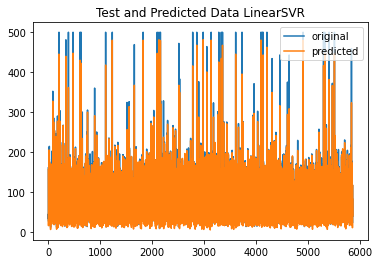

In [ ]:
x_ax = range(len(test_y))
plt.plot(x_ax, test_y, label="original")
plt.plot(x_ax, svr_predictions, label="predicted")
plt.title("Test and Predicted Data LinearSVR")
plt.legend()
plt.show()

### Hyperparameter Tuning

In [ ]:
param_svr = {
    'svr_reg__C' : [1.0 , 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0],
    'svr_reg__epsilon' : [0.0, 0.1, 0.25, 0.5, 1.0]
}

In [ ]:
rs_svr = GridSearchCV(svr_pipe, param_grid = param_svr, scoring = 'neg_root_mean_squared_error')

In [ ]:
rs_svr.fit(train_x, train_y)

GridSearchCV(estimator=Pipeline(steps=[('transformer3', MinMaxScaler()),
                                       ('svr_reg', LinearSVR())]),
             param_grid={'svr_reg__C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                        9.0, 10.0],
                         'svr_reg__epsilon': [0.0, 0.1, 0.25, 0.5, 1.0]},
             scoring='neg_root_mean_squared_error')

In [ ]:
rs_svr.best_params_

{'svr_reg__C': 2.0, 'svr_reg__epsilon': 1.0}

In [ ]:
svr_ht =  LinearSVR(C = 2.0, epsilon = 1.0)
svr_ht.fit(train_x, train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=2.0, epsilon=1.0)

In [ ]:
svr_ht_pred = svr_ht.predict(test_x)

In [ ]:
print('RMSE : ', sqrt(mean_squared_error(test_y,svr_ht_pred)))

RMSE :  9.946232977094057


In [ ]:
print('MAPE : {0:.3f}%'.format(mape(test_y, svr_ht_pred)))

MAPE : 7.162%


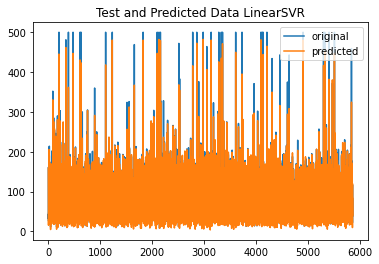

In [ ]:
x_ax = range(len(test_y))
plt.plot(x_ax, test_y, label="original")
plt.plot(x_ax, svr_ht_pred, label="predicted")
plt.title("Test and Predicted Data LinearSVR")
plt.legend()
plt.show()

# Result

Modelling Tanpa Hyperparameter Tuning

*   XG Boost Regressor mendapatkan hasil RMSE sebesar 2.736
      
*   Random Forest Regressor mendapatkan hasil RMSE sebesar  3.091
      
*   LinerSVR mendapatkan hasil RMSE sebesar  10.348
        

Modelling Dengan Hyperparameter Tuning

*   XG Boost Regressor mendapatkan hasil RMSE sebesar 2.708 dengan parameter
         xg.XGBRegressor(n_estimators = 750, max_depth = 50, learning_rate = 0.01)
*   Random Forest Regressor mendapatkan hasil RMSE sebesar  3.064 dengan parameter
          RandomForestRegressor(n_estimators = 500, max_features = 8, max_depth= 100)
*   LinerSVR mendapatkan hasil RMSE sebesar  10.348 dengan parameter
        LinearSVR(C = 2.0, epsilon = 1.0)

# Kesimpulan

Dari hasil modelling diatas didapatkan bahwa model yang terbaik adalah XGBoost Regressor,lalu  RandomForest Regressor dan terkahir LinearSVR jika dihitung dari performa metrik RMSE


Polutan yang paling memengaruhi AQI Value Index adalah PM2.5, jadi negara negara dan lembaga pemerhati lingkungan harus fokus untuk mengurangi polutan PM2.5, dimana menurut Avinash Chandal dari GreenPeace India, polusi udara PM 2,5 dihasilkan melalui pembakaran bahan bakar termasuk batu bara, minyak dan gas fosil yang saat ini menjadi bahan bakar utama di seluruh negara di dunia.